In [1]:
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca
import matplotlib.gridspec as gridspec

In [2]:
# Choose data set
E866 = 1
E772 = 1
E906 = 0
HERMES = 1
ATLAS = 1
RHIC = 1
CMS5 = 1
CMS8 = 0
JLAB = 0
collinear = 0
FULLPLOT = 0
jlab = 1

In [3]:
from scipy.interpolate import CubicSpline

def cubic(x_in,y_in,axes,clr):
    """Plot data points and their cubic spline interpolation."""
    
    # Interpolate data using cubic spline
    cs = CubicSpline(x_in, y_in)
    
    # Define a dense x-axis for smooth plotting
    x = np.linspace(min(x_in), max(x_in), 1000)
    y = cs(x)
    
    axes.plot(x,y,color=clr)

In [4]:
def JLAB2022_P(axes,j):
    
    d0 = np.loadtxt("../plot_data/JLAB2022/pi+.dat",skiprows=1)[:, :]
    d1 = np.loadtxt("../plot_data/JLAB2022/pi+C_pre1.dat",skiprows=1)[:, :]
    d2= np.loadtxt("../plot_data/JLAB2022/pi+Fe_pre1.dat",skiprows=1)[:, :]
    d3 = np.loadtxt("../plot_data/JLAB2022/pi+Pb_pre1.dat",skiprows=1)[:, :]

    pt0 = 0.5*(d0[:,3]+d0[:,4]) 
    pt0 = np.sqrt(pt0[0:4])

    c00 = d0[:,5]
    dc00 = d0[:,14]
    fe00 = d0[:,8]
    dfe00 = d0[:,15]
    pb00 = d0[:,11]
    dpb00 = d0[:,16]

    r11 = (d1[:,7]/d1[:,6])/d1[:,8]
    r22 = (d2[:,7]/d2[:,6])/d2[:,8]
    r33 = (d3[:,7]/d3[:,6])/d3[:,8]

    c0=np.empty(4, dtype=object)
    dc0=np.empty(4, dtype=object)
    fe0=np.empty(4, dtype=object)
    dfe0=np.empty(4, dtype=object)
    pb0=np.empty(4, dtype=object)
    dpb0=np.empty(4, dtype=object)

    r1=np.empty(4, dtype=object)
    r2=np.empty(4, dtype=object)
    r3=np.empty(4, dtype=object)

    for i in range(4):
        c0[i]=c00[0+8*i:4+8*i]
        dc0[i]=dc00[0+8*i:4+8*i]
        fe0[i]=fe00[0+8*i:4+8*i] 
        dfe0[i]=dfe00[0+8*i:4+8*i]
        pb0[i]=pb00[0+8*i:4+8*i]
        dpb0[i]=dpb00[0+8*i:4+8*i]

        r1[i]=r11[0+4*i:4+4*i]
        r2[i]=r22[0+4*i:4+4*i]
        r3[i]=r33[0+4*i:4+4*i]

    c0p=np.empty(4, dtype=object)
    dc0p=np.empty(4, dtype=object)
    fe0p=np.empty(4, dtype=object)
    dfe0p=np.empty(4, dtype=object)
    pb0p=np.empty(4, dtype=object)
    dpb0p=np.empty(4, dtype=object)

    rang = [0,1,2,3]

    for i in range(4):    
        c0p[i]=c0[i][0:rang[i]]
        dc0p[i]=dc0[i][0:rang[i]]
        fe0p[i]=fe0[i][0:rang[i]]
        dfe0p[i]=dfe0[i][0:rang[i]]
        pb0p[i]=pb0[i][0:rang[i]]
        dpb0p[i]=dpb0[i][0:rang[i]]
        
    p=np.empty(4, dtype=object)

    p[0] = np.array([]) 
    p[1] = pt0[0:1]
    p[2] = pt0[0:2]
    p[3] = pt0[0:3]

    axes.errorbar(pt0,c0[j],yerr=dc0[j],fmt = "o", mfc='none',color = 'red', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(pt0,fe0[j],yerr=dfe0[j],fmt = "o", mfc='none',color = 'blue', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(pt0,pb0[j],yerr=dpb0[j],fmt = "o", mfc='none',color = 'black', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    
    axes.errorbar(p[j],c0p[j],yerr=dc0p[j],fmt = "o", color = 'red', label = '${\mathrm{JLAB-C}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(p[j],fe0p[j],yerr=dfe0p[j],fmt = "o", color = 'blue', label = '${\mathrm{JLAB-Fe}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(p[j],pb0p[j],yerr=dpb0p[j],fmt = "o", color = 'black', label = '${\mathrm{JLAB-Pb}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)

    cubic(pt0,r1[j],axes,'red')
    cubic(pt0,r2[j],axes,'blue')
    cubic(pt0,r3[j],axes,'black')
    
def JLAB2022_M(axes,j):
    
    d0 = np.loadtxt("../plot_data/JLAB2022/pi-.dat",skiprows=1)[:, :]
    d1 = np.loadtxt("../plot_data/JLAB2022/pi-C_pre1.dat",skiprows=1)[:, :]
    d2= np.loadtxt("../plot_data/JLAB2022/pi-Fe_pre1.dat",skiprows=1)[:, :]
    d3 = np.loadtxt("../plot_data/JLAB2022/pi-Pb_pre1.dat",skiprows=1)[:, :]

    pt0 = 0.5*(d0[:,3]+d0[:,4]) 
    pt0 = np.sqrt(pt0[0:4])

    c00 = d0[:,5]
    dc00 = d0[:,14]
    fe00 = d0[:,8]
    dfe00 = d0[:,15]
    pb00 = d0[:,11]
    dpb00 = d0[:,16]

    r11 = (d1[:,7]/d1[:,6])/d1[:,8]
    r22 = (d2[:,7]/d2[:,6])/d2[:,8]
    r33 = (d3[:,7]/d3[:,6])/d3[:,8]

    c0=np.empty(4, dtype=object)
    dc0=np.empty(4, dtype=object)
    fe0=np.empty(4, dtype=object)
    dfe0=np.empty(4, dtype=object)
    pb0=np.empty(4, dtype=object)
    dpb0=np.empty(4, dtype=object)

    r1=np.empty(4, dtype=object)
    r2=np.empty(4, dtype=object)
    r3=np.empty(4, dtype=object)

    for i in range(4):
        c0[i]=c00[0+8*i:4+8*i]
        dc0[i]=dc00[0+8*i:4+8*i]
        fe0[i]=fe00[0+8*i:4+8*i] 
        dfe0[i]=dfe00[0+8*i:4+8*i]
        pb0[i]=pb00[0+8*i:4+8*i]
        dpb0[i]=dpb00[0+8*i:4+8*i]

        r1[i]=r11[0+4*i:4+4*i]
        r2[i]=r22[0+4*i:4+4*i]
        r3[i]=r33[0+4*i:4+4*i]

    c0p=np.empty(4, dtype=object)
    dc0p=np.empty(4, dtype=object)
    fe0p=np.empty(4, dtype=object)
    dfe0p=np.empty(4, dtype=object)
    pb0p=np.empty(4, dtype=object)
    dpb0p=np.empty(4, dtype=object)

    rang = [0,1,2,3]

    for i in range(4):    
        c0p[i]=c0[i][0:rang[i]]
        dc0p[i]=dc0[i][0:rang[i]]
        fe0p[i]=fe0[i][0:rang[i]]
        dfe0p[i]=dfe0[i][0:rang[i]]
        pb0p[i]=pb0[i][0:rang[i]]
        dpb0p[i]=dpb0[i][0:rang[i]]
        
    p=np.empty(4, dtype=object)

    p[0] = np.array([]) 
    p[1] = pt0[0:1]
    p[2] = pt0[0:2]
    p[3] = pt0[0:3]
    
    axes.errorbar(pt0,c0[j],yerr=dc0[j],fmt = "o", mfc='none',color = 'red', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(pt0,fe0[j],yerr=dfe0[j],fmt = "o", mfc='none',color = 'blue', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(pt0,pb0[j],yerr=dpb0[j],fmt = "o", mfc='none',color = 'black', linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    
    axes.errorbar(p[j],c0p[j],yerr=dc0p[j],fmt = "o", color = 'red', label = '${\mathrm{JLAB_C}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(p[j],fe0p[j],yerr=dfe0p[j],fmt = "o", color = 'blue', label = '${\mathrm{JLAB_Fe}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    axes.errorbar(p[j],pb0p[j],yerr=dpb0p[j],fmt = "o", color = 'black', label = '${\mathrm{JLAB_Pb}}$',linewidth = 1,capsize = 5, capthick =0.8, barsabove = False)
    
    cubic(pt0,r1[j],axes,'red')
    cubic(pt0,r2[j],axes,'blue')
    cubic(pt0,r3[j],axes,'black')

In [5]:
def HERMES_plot():
    
    pip_ne_pt2 = pd.read_csv('../plot_data/HERMES/pip_ne_pt1.dat', sep ='\s+' ).to_numpy()
    pip_kr_pt2 = pd.read_csv('../plot_data/HERMES/pip_kr_pt1.dat', sep ='\s+').to_numpy()
    pip_xe_pt2 = pd.read_csv('../plot_data/HERMES/pip_xe_pt1.dat', sep ='\s+').to_numpy()

    pim_ne_pt2 = pd.read_csv('../plot_data/HERMES/pim_ne_pt1.dat', sep ='\s+').to_numpy()
    pim_kr_pt2 = pd.read_csv('../plot_data/HERMES/pim_kr_pt1.dat', sep ='\s+').to_numpy()
    pim_xe_pt2 = pd.read_csv('../plot_data/HERMES/pim_xe_pt1.dat', sep ='\s+').to_numpy()

    pi0_ne_pt2 = pd.read_csv('../plot_data/HERMES/pi0_ne_pt1.dat', sep ='\s+').to_numpy()
    pi0_kr_pt2 = pd.read_csv('../plot_data/HERMES/pi0_kr_pt1.dat', sep ='\s+').to_numpy()
    pi0_xe_pt2 = pd.read_csv('../plot_data/HERMES/pi0_xe_pt1.dat', sep ='\s+').to_numpy()

    ax00.errorbar(np.sqrt(pip_ne_pt2[:,3]),pip_ne_pt2[:,4], np.sqrt(pip_ne_pt2[:,5]**2+pip_ne_pt2[:,6]**2), fmt = "o",mfc='none',color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax00.errorbar(np.sqrt(pip_kr_pt2[:,3]),pip_kr_pt2[:,4], np.sqrt(pip_kr_pt2[:,5]**2+pip_kr_pt2[:,6]**2), fmt = "o",mfc='none',color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax00.errorbar(np.sqrt(pip_xe_pt2[:,3]),pip_xe_pt2[:,4], np.sqrt(pip_xe_pt2[:,5]**2+pip_xe_pt2[:,6]**2), fmt = "o",mfc='none',color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)

    ax01.errorbar(np.sqrt(pi0_ne_pt2[:,3]),pi0_ne_pt2[:,4], np.sqrt(pi0_ne_pt2[:,5]**2+pi0_ne_pt2[:,6]**2), fmt = "o",mfc='none',color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax01.errorbar(np.sqrt(pi0_kr_pt2[:,3]),pi0_kr_pt2[:,4], np.sqrt(pi0_kr_pt2[:,5]**2+pi0_kr_pt2[:,6]**2), fmt = "o",mfc='none',color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax01.errorbar(np.sqrt(pi0_xe_pt2[:,3]),pi0_xe_pt2[:,4], np.sqrt(pi0_xe_pt2[:,5]**2+pi0_xe_pt2[:,6]**2), fmt = "o",mfc='none',color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)

    ax02.errorbar(np.sqrt(pim_ne_pt2[:,3]),pim_ne_pt2[:,4], np.sqrt(pim_ne_pt2[:,5]**2+pim_ne_pt2[:,6]**2), fmt = "o",mfc='none',color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False )
    ax02.errorbar(np.sqrt(pim_kr_pt2[:,3]),pim_kr_pt2[:,4], np.sqrt(pim_kr_pt2[:,5]**2+pim_kr_pt2[:,6]**2), fmt = "o",mfc='none',color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax02.errorbar(np.sqrt(pim_xe_pt2[:,3]),pim_xe_pt2[:,4], np.sqrt(pim_xe_pt2[:,5]**2+pim_xe_pt2[:,6]**2), fmt = "o",mfc='none',color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)

    
    ax00.errorbar(np.sqrt(pip_ne_pt2[:,3][0:2]),pip_ne_pt2[:,4][0:2], np.sqrt(pip_ne_pt2[:,5][0:2]**2+pip_ne_pt2[:,6][0:2]**2), fmt = "o",color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax00.errorbar(np.sqrt(pip_kr_pt2[:,3][0:2]),pip_kr_pt2[:,4][0:2], np.sqrt(pip_kr_pt2[:,5][0:2]**2+pip_kr_pt2[:,6][0:2]**2), fmt = "o",color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax00.errorbar(np.sqrt(pip_xe_pt2[:,3][0:2]),pip_xe_pt2[:,4][0:2], np.sqrt(pip_xe_pt2[:,5][0:2]**2+pip_xe_pt2[:,6][0:2]**2), fmt = "o",color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)

    ax01.errorbar(np.sqrt(pi0_ne_pt2[:,3][0:2]),pi0_ne_pt2[:,4][0:2], np.sqrt(pi0_ne_pt2[:,5][0:2]**2+pi0_ne_pt2[:,6][0:2]**2), fmt = "o",color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax01.errorbar(np.sqrt(pi0_kr_pt2[:,3][0:2]),pi0_kr_pt2[:,4][0:2], np.sqrt(pi0_kr_pt2[:,5][0:2]**2+pi0_kr_pt2[:,6][0:2]**2), fmt = "o",color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    ax01.errorbar(np.sqrt(pi0_xe_pt2[:,3][0:2]),pi0_xe_pt2[:,4][0:2], np.sqrt(pi0_xe_pt2[:,5][0:2]**2+pi0_xe_pt2[:,6][0:2]**2), fmt = "o",color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)

    ax02.errorbar(np.sqrt(pim_ne_pt2[:,3][0:2]),pim_ne_pt2[:,4][0:2], np.sqrt(pim_ne_pt2[:,5][0:2]**2+pim_ne_pt2[:,6][0:2]**2), fmt = "o",color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False, label = r'\rm HERMES-Ne')
    ax02.errorbar(np.sqrt(pim_kr_pt2[:,3][0:2]),pim_kr_pt2[:,4][0:2], np.sqrt(pim_kr_pt2[:,5][0:2]**2+pim_kr_pt2[:,6][0:2]**2), fmt = "o",color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,  label = r'\rm HERMES-Kr')
    ax02.errorbar(np.sqrt(pim_xe_pt2[:,3][0:2]),pim_xe_pt2[:,4][0:2], np.sqrt(pim_xe_pt2[:,5][0:2]**2+pim_xe_pt2[:,6][0:2]**2), fmt = "o",color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,  label = r'\rm HERMES-Xe')


    cubic(np.sqrt(pip_ne_pt2[:,3]),pip_ne_pt2[:,8]/pip_ne_pt2[:,7]/pip_ne_pt2[:,9], ax00, 'black')
    cubic(np.sqrt(pip_kr_pt2[:,3]),pip_kr_pt2[:,8]/pip_kr_pt2[:,7]/pip_kr_pt2[:,9], ax00, 'green')
    cubic(np.sqrt(pip_xe_pt2[:,3]),pip_xe_pt2[:,8]/pip_xe_pt2[:,7]/pip_xe_pt2[:,9], ax00, 'blue')

    cubic(np.sqrt(pi0_ne_pt2[:,3]),pi0_ne_pt2[:,8]/pi0_ne_pt2[:,7]/pi0_ne_pt2[:,9], ax01, 'black')
    cubic(np.sqrt(pi0_kr_pt2[:,3]),pi0_kr_pt2[:,8]/pi0_kr_pt2[:,7]/pi0_kr_pt2[:,9], ax01, 'green')
    cubic(np.sqrt(pi0_xe_pt2[:,3]),pi0_xe_pt2[:,8]/pi0_xe_pt2[:,7]/pi0_xe_pt2[:,9], ax01, 'blue')

    cubic(np.sqrt(pim_ne_pt2[:,3]),pim_ne_pt2[:,8]/pim_ne_pt2[:,7]/pim_ne_pt2[:,9], ax02, 'black')
    cubic(np.sqrt(pim_kr_pt2[:,3]),pim_kr_pt2[:,8]/pim_kr_pt2[:,7]/pim_kr_pt2[:,9], ax02, 'green')
    cubic(np.sqrt(pim_xe_pt2[:,3]),pim_xe_pt2[:,8]/pim_xe_pt2[:,7]/pim_xe_pt2[:,9], ax02, 'blue')

In [6]:
def E772_plot():
    E772_C_df = pd.read_csv('../plot_data/E772_800_CD1.dat', sep ='\s+')
    E772_Ca_df = pd.read_csv('../plot_data/E772_800_CaD1.dat', sep ='\s+')
    E772_Fe_df = pd.read_csv('../plot_data/E772_800_FeD1.dat', sep ='\s+')
    E772_W_df = pd.read_csv('../plot_data/E772_800_WD1.dat', sep ='\s+')
    
    Qbar = 6.2
    class dydata:
        def __init__(self, xdata, ydata, error, theory):
            self.xdata = xdata[(xdata/Qbar < 0.3)]
            self.ydata = ydata[(xdata/Qbar < 0.3)]
            self.error = error[(xdata/Qbar < 0.3)]
            self.theory = theory[(xdata/Qbar < 0.3)]
            self.num    = len(self.xdata)
    class dydata2:
        def __init__(self, xdata, ydata, error):
            self.xdata = xdata
            self.ydata = ydata
            self.error = error
    
    E772_C = dydata(E772_C_df['pt'], E772_C_df['DY-RATIO'], E772_C_df['error'], E772_C_df['R_dy'])
    E772_Ca = dydata(E772_Ca_df['pt'], E772_Ca_df['DY-RATIO'], E772_Ca_df['error'], E772_Ca_df['R_dy'])
    E772_Fe = dydata(E772_Fe_df['pt'], E772_Fe_df['DY-RATIO'], E772_Fe_df['error'], E772_Fe_df['R_dy'])
    E772_W = dydata(E772_W_df['pt'], E772_W_df['DY-RATIO'], E772_W_df['error'], E772_W_df['R_dy'])
    
    def dyplot(axes, data, clr):
        axes.errorbar(data.xdata, 0.8*data.ydata, 0.8*data.error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, label = r"\rm E772 $\times 0.8$, $ B =$ D")
        cubic(data.xdata, 0.8*data.theory, axes, clr)
        #axes.tick_params(axis = 'both', direction ='in',labelsize = 25)
    
    dyplot(ax10, E772_C, 'orange')
    dyplot(ax11, E772_Fe, 'orange')
    dyplot(ax12, E772_W, 'orange')

In [7]:
def E866_plot():
    FNAL_E866_FeBe_Qbin_df = pd.read_csv('../plot_data/E866_800_Qbin_FeBe.dat', sep ='\s+')
    FNAL_E866_WBe_Qbin_df = pd.read_csv('../plot_data/E866_800_Qbin_WBe.dat', sep ='\s+')

    Qbar = 6.2
    class dydata:
        def __init__(self, file, i1, i2):
            self.xdata = file['pt'][i1:i2]
            self.ydata = file['DY-RATIO'][i1:i2]
            self.error = file['error'][i1:i2]
            self.theory = file['R_dy'][i1:i2]
            self.num    = len(self.xdata)
    FeBe_Data_Qbin1 = dydata(FNAL_E866_FeBe_Qbin_df, 0,3)
    FeBe_Data_Qbin2 = dydata(FNAL_E866_FeBe_Qbin_df, 3,6)
    FeBe_Data_Qbin3 = dydata(FNAL_E866_FeBe_Qbin_df, 6,10)
    FeBe_Data_Qbin4 = dydata(FNAL_E866_FeBe_Qbin_df, 10,14)

    WBe_Data_Qbin1 = dydata(FNAL_E866_WBe_Qbin_df, 0,3)
    WBe_Data_Qbin2 = dydata(FNAL_E866_WBe_Qbin_df, 3,6)
    WBe_Data_Qbin3 = dydata(FNAL_E866_WBe_Qbin_df, 6,10)
    WBe_Data_Qbin4 = dydata(FNAL_E866_WBe_Qbin_df, 10,14)
    
    def dyplot(axes, data, clr, factor, lbl, ffmt):
        axes.errorbar(data.xdata, factor*data.ydata, factor*data.error,color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,fmt=ffmt, label = lbl)
        cubic(data.xdata, factor*data.theory, axes, clr)
        #axes.tick_params(axis = 'both', direction ='in',labelsize = 25)

    dyplot(ax11,FeBe_Data_Qbin4,'red',1.6,r'\rm E866 $\times 1.6$, $7 < Q < 8$ (GeV)',"o")
    dyplot(ax11,FeBe_Data_Qbin3,'black',1.4,r'\rm E866 $\times 1.4$, $6 < Q < 7$ (GeV)',"^")        
    dyplot(ax11,FeBe_Data_Qbin2,'green',1.2,r'\rm E866 $\times 1.2$, $5 < Q < 6$ (GeV)',"v")    
    dyplot(ax11,FeBe_Data_Qbin1,'blue',1.0,r'\rm E866 $\times 1.0$, $4 < Q < 5$ (GeV)',"*")

    dyplot(ax12,WBe_Data_Qbin4,'red',1.6,r'\rm E866 $\times 1.6$, $7 < Q < 8$ (GeV)',"o")
    dyplot(ax12,WBe_Data_Qbin3,'black',1.4,r'\rm E866 $\times 1.4$, $6 < Q < 7$ (GeV)',"^")    
    dyplot(ax12,WBe_Data_Qbin2,'green',1.2,r'\rm E866 $\times 1.2$, $5 < Q < 6$ (GeV)',"v")    
    dyplot(ax12,WBe_Data_Qbin1,'blue',1.0,r'\rm E866 $\times 1.0$, $4 < Q < 5$ (GeV)',"*")

In [8]:
def CMS5_plot():   
    
    df = pd.read_csv("../plot_data/CMS5.dat", delim_whitespace=True)

    ax03.errorbar(df.pt, df.CX/1000.,df.ERR/1000.,fmt = "o", label = r"\rm CMS, $\mathcal{N} = 1.08$",color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    cubic(df.pt, df.FUU/1000.,ax03,'black')

    ax03.semilogy()

In [9]:
def RHIC_plot():

    path2dat = "../plot_data/"
    datalst = os.listdir(path2dat)

    df_pp = pd.read_csv('../expdata/DRELLYAN/RHIC2/RHIC_pp.dat', sep ='\s+')    
    df_pp = df_pp.iloc[:2]  
    
    for address in datalst:
        if('Au1' in address):
            df_Au1 = pd.read_csv(path2dat+address, sep ='\s+')
        if('Au2' in address):
            df_Au2 = pd.read_csv(path2dat+address, sep ='\s+')
            
    CX = "CX"
    pt = "pt"
    err = "ERR"
    
    ax13.errorbar(df_Au1[pt], 1.3*df_Au1[CX], yerr= 1.3*df_Au1[err], fmt = "o",color = "red", ecolor = "red", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r'\rm RHIC $\times 1.3, \ -2.2 < y < -1.2, B =$ p')
    ax13.errorbar(df_Au2[pt], df_Au2[CX], yerr= df_Au2[err], fmt = "^",color = "black", ecolor = "black", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r'\rm RHIC  $\times 1.0, 1.2 < y < 2.2$')
    
    cubic(df_Au1[pt], (1.3*df_Au1["FUU"]), ax13, "red")
    cubic(df_Au1[pt], (df_Au2["FUU"]), ax13, "black")

In [10]:
def ATLAS5_plot():  

    df = pd.read_csv("../plot_data/ATLAS5_Y1.dat", delim_whitespace=True)

    ax03.errorbar(df.pt, df.pt*df.CX/1000.,df.pt*df.ERR/1000.,fmt = "^", label = r"\rm ATLAS, $-3<y<2\,$,  $\mathcal{N} = 1.07$",color = 'red', ecolor = 'red', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    cubic(df.pt, df.pt*df.FUU/1000., ax03, 'red')

    ax03.semilogy()

In [11]:
def ATLAS5_2(axes,filename_bin,clr,lbl,ffmt):  
    filename0 = "ATLAS5_Y1.dat"
    filename = "ATLAS5_Y2.dat"
    filename2 = "ATLAS5_Y3.dat"
    path2dat = pwd+'/data_reps/data_rep_000/'
    maxx0 = []
    minn0 = []
    maxx = []
    minn = []
    maxx2 = []
    minn2 = []
    for i in range(len(maxlib[filename0])):
            maxx0.append(maxlib[filename0][i]/1000.)
            minn0.append(minlib[filename0][i]/1000.)
    for i in range(len(maxlib[filename])):
            maxx.append(maxlib[filename][i]/3000.)
            minn.append(minlib[filename][i]/3000.)
            
    for i in range(len(maxlib[filename2])):
            maxx2.append(maxlib[filename2][i]/1000.)
            minn2.append(minlib[filename2][i]/1000.) 
    maxxc0 = []
    minnc0 = []
    maxxc = []
    minnc = []
    maxxc2 = []
    minnc2 = []
    if(collinear ==1):
        for i in range(len(maxrat[filename0])):
                maxxc0.append(maxrat[filename0][i]/1000.)
                minnc0.append(minrat[filename0][i]/1000.)  
        for i in range(len(maxrat[filename])):
                maxxc.append(maxrat[filename][i]/3000.)
                minnc.append(minrat[filename][i]/3000.)     
        for i in range(len(maxrat[filename2])):
                maxxc2.append(maxrat[filename2][i]/1000.)
                minnc2.append(minrat[filename2][i]/1000.) 
        file0 = (pd.read_csv(path2dat + filename0, sep ='\s+'))
        xdata0 = file0['pt']
        ydata0 = file0['CX']
        error0 = file0['ERR']             
        file = (pd.read_csv(path2dat + filename, sep ='\s+'))
        xdata = file['pt'][:4]
        ydata = file['CX'][:4]
        error = file['ERR'][:4]
        file2 = (pd.read_csv(path2dat + filename2, sep ='\s+'))
        xdata2 = file2['pt'][:4]
        ydata2 = file2['CX'][:4]
        error2 = file2['ERR'][:4]
    
    if(filename_bin == "ATLAS5_Y1.dat"):
        axes.errorbar(xdata0, xdata0*ydata0/1000.,xdata0*error0/1000.,fmt = ffmt, color = clr, label = lbl,capsize = 5)
        axes.step(xdata0,xdata0*maxx0, where = 'mid',color = clr,alpha=0.4,label="_nolegend_")
        axes.step(xdata0,xdata0*minn0, where = 'mid',color = clr,alpha=0.4,label="_nolegend_")
        axes.fill_between(xdata0,xdata0*maxx0,xdata0*minn0, step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
        if(collinear==1):
            #collinear
            #axes.step(xdata,xdata*maxxc[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            #axes.step(xdata,xdata*minnc[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            axes.fill_between(xdata0,xdata0*maxxc0,xdata0*minnc0, step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            
    if(filename_bin == "ATLAS5_Y2.dat"):
        axes.errorbar(xdata, xdata*ydata/3000.,xdata*error/3000.,fmt = ffmt, color = clr, label = lbl,capsize = 5)
        axes.step(xdata,xdata*maxx[:4], where = 'mid',color = clr,alpha=0.4,label="_nolegend_")
        axes.step(xdata,xdata*minn[:4], where = 'mid',color = clr,alpha=0.4,label="_nolegend_")
        axes.fill_between(xdata,xdata*maxx[:4],xdata*minn[:4], step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
        if(collinear==1):
            #collinear
            #axes.step(xdata,xdata*maxxc[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            #axes.step(xdata,xdata*minnc[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            axes.fill_between(xdata,xdata*maxxc[:4],xdata*minnc[:4], step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
    elif(filename_bin == "ATLAS5_Y3.dat"):
        axes.step(xdata2,xdata2*maxx2[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        axes.step(xdata2,xdata2*minn2[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        axes.fill_between(xdata2,xdata2*maxx2[:4],xdata2*minn2[:4], step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
        if(collinear ==1):
            #collinear
            #axes.step(xdata,xdata*maxxc2[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            #axes.step(xdata,xdata*minnc2[:4], where = 'mid',color = clr,alpha=0.2,label="_nolegend_")
            axes.fill_between(xdata,xdata*maxxc2[:4],xdata*minnc2[:4], step = 'mid',color = clr,alpha=0.2,label="_nolegend_")
        
        #data
        axes.errorbar(xdata2, xdata2*ydata2/1000. ,xdata2*error2/1000. ,fmt = "o",color = clr, label = lbl,capsize = 5)

        
    axes.semilogy()

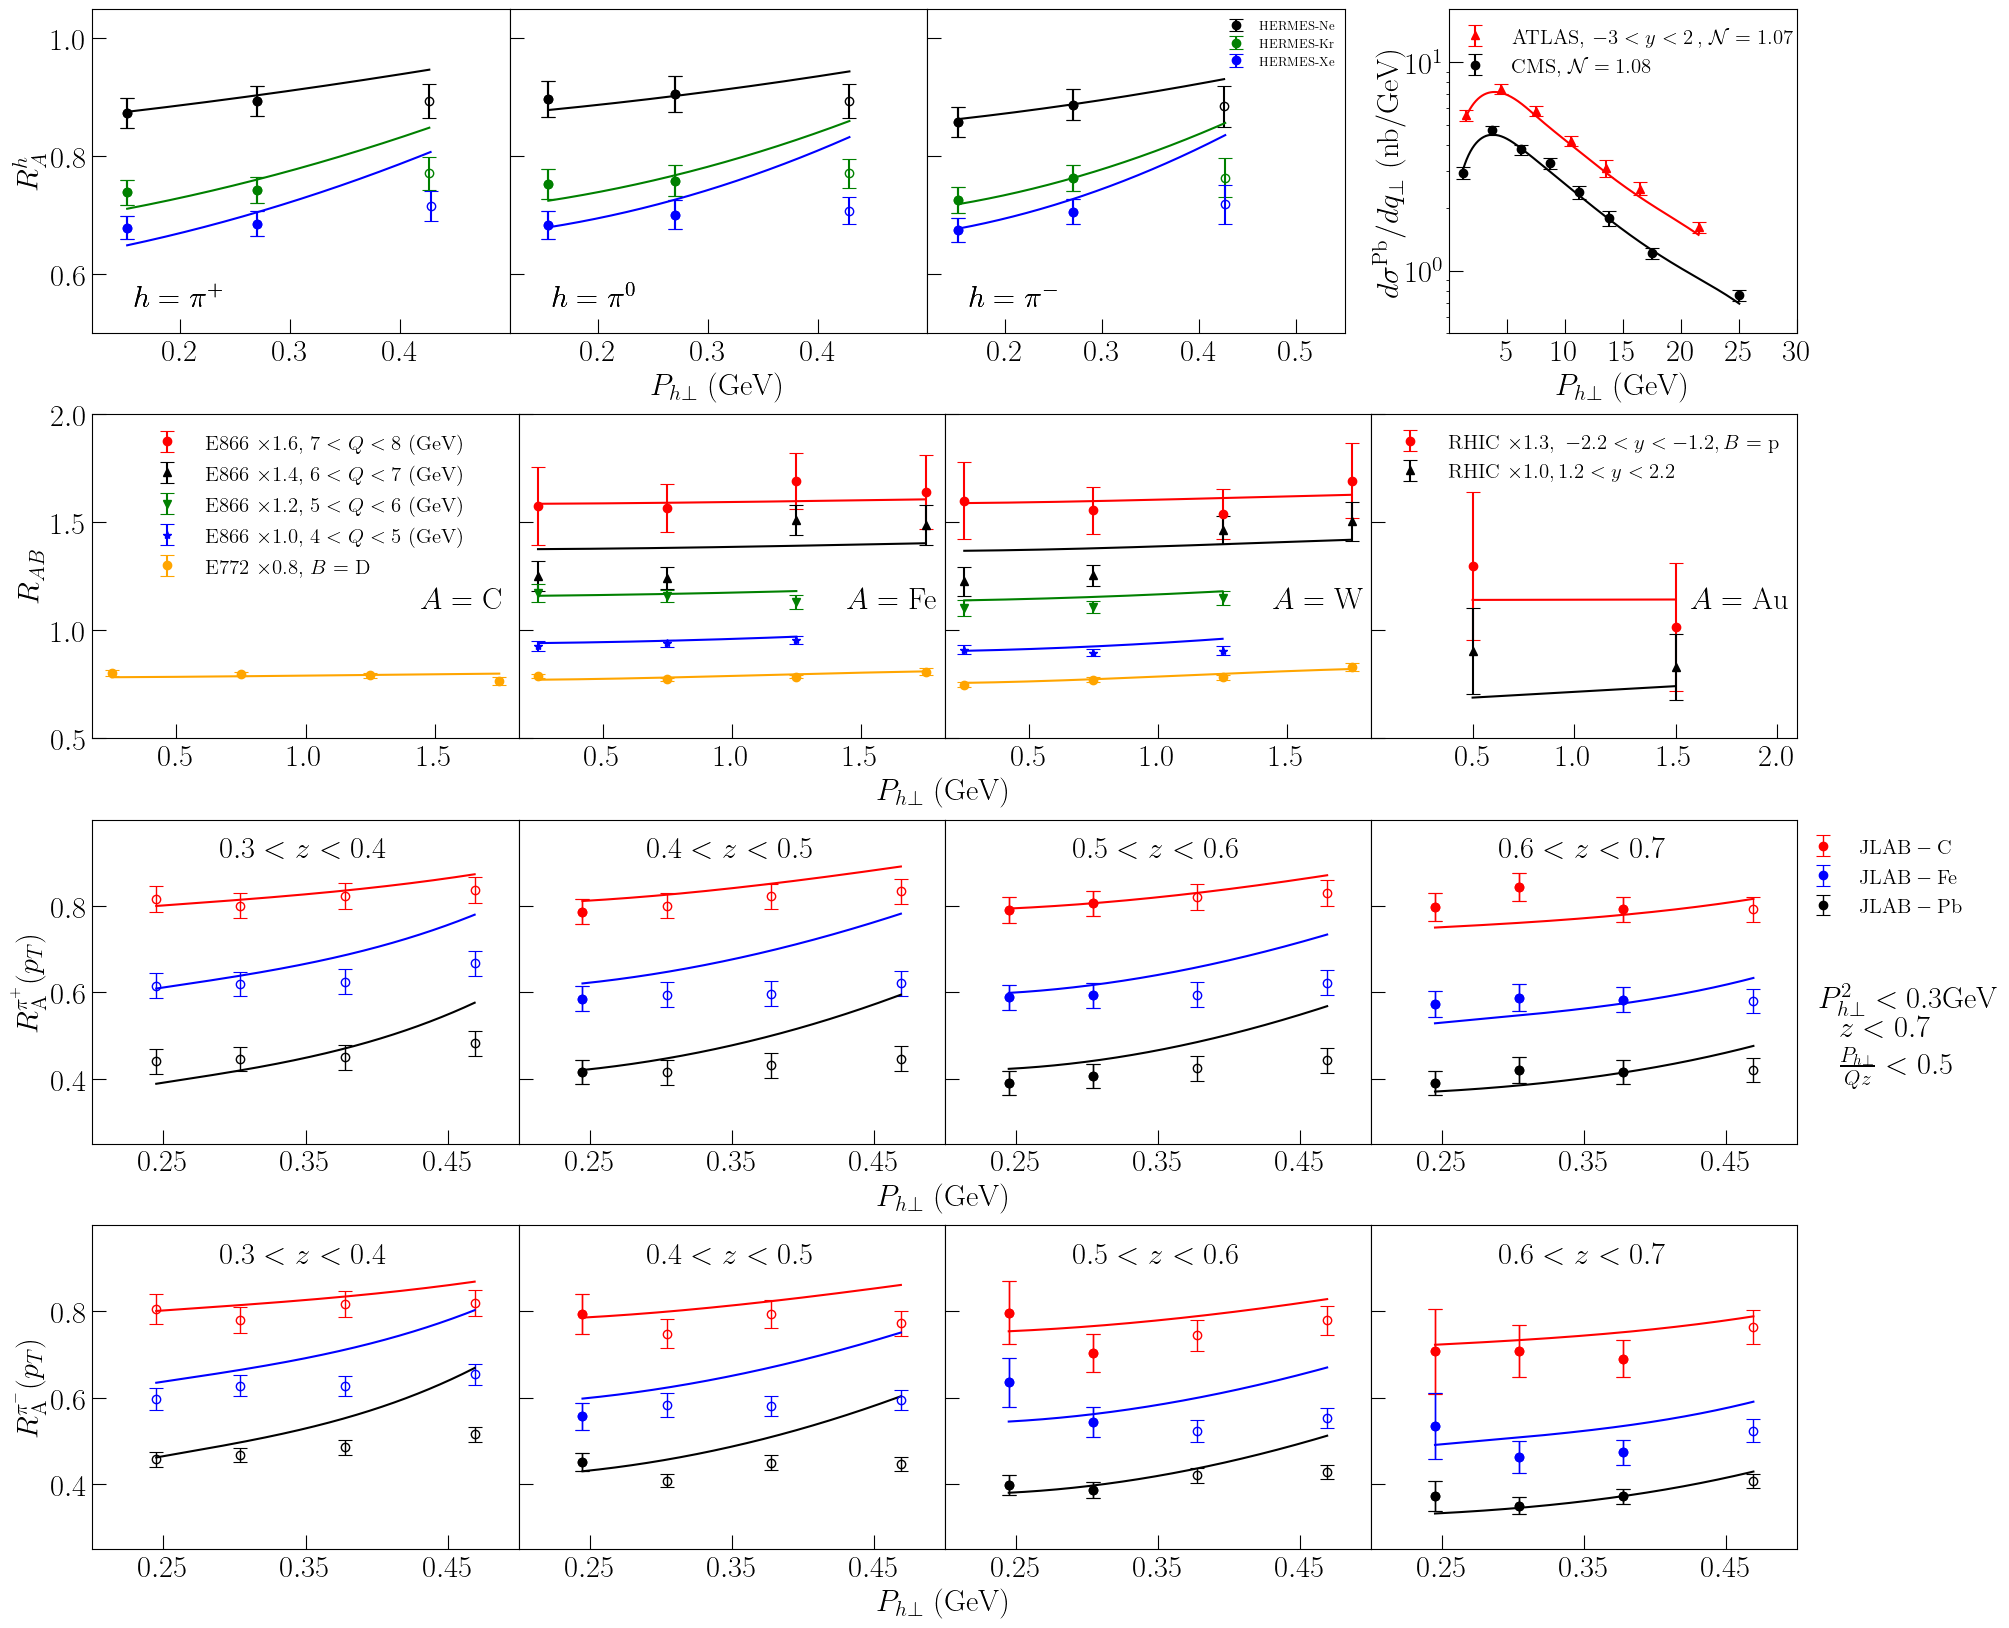

In [12]:
fig = plt.figure()

## Initialization of Figure
nrows = 4 
ncolumns = 4 
gs = gridspec.GridSpec(nrows, ncolumns, figure = fig, hspace = 0.25, wspace =0.3)


## Row 1 
## Subplot 1 : SIDIS Data
gs00 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0:3], wspace=0)
ax00 = plt.subplot(gs00[0])
ax01 = plt.subplot(gs00[1])
ax02 = plt.subplot(gs00[2])

## Subplot 2 :  LHC Data
ax03 = plt.subplot(gs[3])

## Subplot 3 : Drell Yan Data
gs01 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[4:8], wspace=0)
ax10 = plt.subplot(gs01[0])
ax11 = plt.subplot(gs01[1])
ax12 = plt.subplot(gs01[2])
ax13 = plt.subplot(gs01[3])

#if FULLPLOT == 1:    
sizeOfFont = 22
collinear = 0
pt2 = 1

if HERMES == 1:
    HERMES_plot()
    
    ## LHC DATA
    
    #ATLAS (5 TeV)
    #ATLAS5(ax03,"ATLAS5_Y3.dat",'red', r"\rm $0<y<2$, $\mathcal{N} = 1.05$","o")
    #ATLAS5(ax03,"ATLAS5_Y2.dat",'black', r"\rm ATLAS $(\times 1/3)$,  $\mathcal{N} = 1.09$","^")
if ATLAS == 1:
    ATLAS5_plot()
    
    #CMS
if CMS5 == 1:
    CMS5_plot()
       
    ##ROW 2: DY DATA
    #E866\
if E866 == 1:
    E866_plot()
            
    #E772
if E772 == 1:
    E772_plot()
        
    #RHIC
if RHIC == 1:
    RHIC_plot()

if jlab == 1:    
    ## Row 3 
    gs02 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[8:12], wspace=0)
    ax20 = plt.subplot(gs02[0])
    ax21 = plt.subplot(gs02[1])
    ax22 = plt.subplot(gs02[2])
    ax23 = plt.subplot(gs02[3])

    JLAB2022_P(ax20, 0)
    JLAB2022_P(ax21, 1)
    JLAB2022_P(ax22, 2)
    JLAB2022_P(ax23, 3)

    ## Row 4 
    gs03 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[12:16], wspace=0)
    ax30 = plt.subplot(gs03[0])
    ax31 = plt.subplot(gs03[1])
    ax32 = plt.subplot(gs03[2])
    ax33 = plt.subplot(gs03[3])

    JLAB2022_M(ax30, 0)
    JLAB2022_M(ax31, 1)
    JLAB2022_M(ax32, 2)
    JLAB2022_M(ax33, 3)
    
#Axis Labels
ax00.set_ylabel(r"\rm $R^h_A$", fontsize = sizeOfFont)
ax10.set_ylabel(r"\rm $R_{AB}$", fontsize = sizeOfFont)
ax20.set_ylabel(r"\rm $R_\mathrm{A}^{\pi^+}(p_{T})$", fontsize = sizeOfFont)
ax30.set_ylabel(r"\rm $R_\mathrm{A}^{\pi^-}(p_{T})$", fontsize = sizeOfFont)
    
#if(pt2==1):
ax01.set_xlabel(r'\rm $P_{h\perp}$ (GeV)',fontsize=sizeOfFont)
#else:
    #ax01.set_xlabel(r'\rm $z$',fontsize=sizeOfFont, x=0.)
    #ax02.set_xlabel(r'\rm $z$',fontsize=sizeOfFont)


ax12.set_xlabel(r'\rm $P_{h\perp}$ (GeV)',fontsize=sizeOfFont, x = 0.)
ax03.set_ylabel(r'\rm $d\sigma^{\rm Pb}/d q_\perp$ (nb/GeV)',fontsize=sizeOfFont, x= 1.,labelpad=-0.1)
ax03.set_xlabel(r'\rm $P_{h\perp}$ (GeV)',fontsize=sizeOfFont)
ax22.set_xlabel(r'\rm $P_{h\perp}$ (GeV)',fontsize=sizeOfFont, x = 0.)
ax32.set_xlabel(r'\rm $P_{h\perp}$ (GeV)',fontsize=sizeOfFont, x = 0.)

    
# Ticks
ax00.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax01.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax02.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax03.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax10.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax11.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax12.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax13.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax20.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax21.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax22.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax23.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax30.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax31.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax32.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
ax33.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
    
ax01.set_yticklabels([])
ax02.set_yticklabels([])
ax11.set_yticklabels([])
ax12.set_yticklabels([])
ax13.set_yticklabels([])
ax21.set_yticklabels([])
ax22.set_yticklabels([])
ax23.set_yticklabels([])
ax31.set_yticklabels([])
ax32.set_yticklabels([])
ax33.set_yticklabels([])
        
#text
    
props = dict(boxstyle='round', facecolor='white', alpha=0)

ax00.text(0.1, 0.15,  r"\rm $ h = \pi^+$", transform=ax00.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)


ax01.text(0.1, 0.15,  r"\rm $ h = \pi^0$", transform=ax01.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
    
    
ax02.text(0.1, 0.15,  r"\rm $ h = \pi^-$", transform=ax02.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
    
    
#if(pt2 ==1):
ax00.text(0.1, 0.15,  r"\rm $ h = \pi^+$", transform=ax00.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)


ax01.text(0.1, 0.15,  r"\rm $ h = \pi^0$", transform=ax01.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
    
    
ax02.text(0.1, 0.15,  r"\rm $ h = \pi^-$", transform=ax02.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
#else:
    #ax00.text(0.1, 0.15,  r"\rm $ h = \pi^+$", transform=ax00.transAxes, fontsize=sizeOfFont,
    #verticalalignment='top', bbox=props)


    #ax02.text(0.1, 0.15,  r"\rm $ h = \pi^0$", transform=ax01.transAxes, fontsize=sizeOfFont,
    #verticalalignment='top', bbox=props)
    
    
    #ax01.text(0.1, 0.15,  r"\rm $ h = \pi^-$", transform=ax02.transAxes, fontsize=sizeOfFont,
    #verticalalignment='top', bbox=props)
        
        
    #ax02.text(0.1, 0.95,  r"\rm Prediction.", transform=ax02.transAxes, fontsize=sizeOfFont,
    #verticalalignment='top', bbox=props)
    
    
ax10.text(0.77, 0.47,  r"\rm $A$ = C", transform=ax10.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

ax11.text(0.77, 0.47,  r"\rm $A$ = Fe", transform=ax11.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

ax12.text(0.77, 0.47,  r"\rm $A$ = W", transform=ax12.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
    
ax13.text(0.75, 0.47,  r"\rm $A$ = Au", transform=ax13.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)
    
props = dict(boxstyle='round', facecolor='gray', alpha=0)
ax20.text(0.3, 0.95, r"\rm $0.3<z<0.4$ ",transform=ax20.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax21.text(0.3, 0.95, r"\rm $0.4<z<0.5$ ",transform=ax21.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props) 
ax22.text(0.3, 0.95, r"\rm $0.5<z<0.6$ ",transform=ax22.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax23.text(0.3, 0.95, r"\rm $0.6<z<0.7$ ",transform=ax23.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax23.text(1.05, 0.5, r"\rm $P_{h\perp}^2<0.3\mathrm{GeV}$ ",transform=ax23.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax23.text(1.1, 0.4, r"\rm $z<0.7$ ",transform=ax23.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax23.text(1.1, 0.3, r"\rm $\frac{P_{h\perp}}{Qz}<0.5$ ",transform=ax23.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='gray', alpha=0)
ax30.text(0.3, 0.95, r"\rm $0.3<z<0.4$ ",transform=ax30.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax31.text(0.3, 0.95, r"\rm $0.4<z<0.5$ ",transform=ax31.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props) 
ax32.text(0.3, 0.95, r"\rm $0.5<z<0.6$ ",transform=ax32.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
ax33.text(0.3, 0.95, r"\rm $0.6<z<0.7$ ",transform=ax33.transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)

    ## Plot limits 
    #ylim
    #HERMES    
ax00.set_ylim(0.5,1.05)
ax01.set_ylim(0.5,1.05)
ax02.set_ylim(0.5,1.05)
    
    
    
#if(pt2==1):
ax00.set_xlim(0.12,0.50)
ax01.set_xlim(0.12,0.50)
ax02.set_xlim(0.12,0.55)
#else:
    #ax00.set_xlim(0.12,0.67)
    #ax01.set_xlim(0.12,0.67)
    #ax02.set_xlim(0.12,0.67)
    
#LHC
ax03.set_ylim(0.5,18)

    
#DY
ax10.set_ylim(0.5,2.0)
ax11.set_ylim(0.5,2.0)
ax12.set_ylim(0.5,2.0)
ax13.set_ylim(0.5,2.0)

ax13.set_xlim(0,2.1)
    
#JLAB2022
ax20.set_ylim(0.25,1)
ax30.set_ylim(0.25,1)
ax21.set_ylim(0.25,1)
ax31.set_ylim(0.25,1)
ax22.set_ylim(0.25,1)
ax32.set_ylim(0.25,1)
ax23.set_ylim(0.25,1)
ax33.set_ylim(0.25,1)

ax20.set_xlim(0.2,0.5)
ax21.set_xlim(0.2,0.5)
ax22.set_xlim(0.2,0.5)
ax23.set_xlim(0.2,0.5)
ax30.set_xlim(0.2,0.5)
ax31.set_xlim(0.2,0.5)
ax32.set_xlim(0.2,0.5)
ax33.set_xlim(0.2,0.5)
    
    
# ticks
ax00.set_xticks([0.2,0.3,0.4])
ax01.set_xticks([0.2,0.3,0.4])
ax02.set_xticks([0.2,0.3,0.4,0.5])
ax03.set_xticks([5,10,15,20,25,30])    
ax13.set_xticks([0.5,1.0,1.5,2.0])

ax20.set_xticks([0.25,0.35,0.45])
ax21.set_xticks([0.25,0.35,0.45])
ax22.set_xticks([0.25,0.35,0.45])
ax23.set_xticks([0.25,0.35,0.45])
ax30.set_xticks([0.25,0.35,0.45])
ax31.set_xticks([0.25,0.35,0.45])
ax32.set_xticks([0.25,0.35,0.45])
ax33.set_xticks([0.25,0.35,0.45])
ax20.set_yticks([0.4,0.6,0.8])
ax30.set_yticks([0.4,0.6,0.8])
ax31.set_yticks([0.4,0.6,0.8])
ax21.set_yticks([0.4,0.6,0.8])
ax32.set_yticks([0.4,0.6,0.8])
ax22.set_yticks([0.4,0.6,0.8])
ax33.set_yticks([0.4,0.6,0.8])
ax23.set_yticks([0.4,0.6,0.8])

#legends
     
ax02.legend(frameon = False,fontsize = sizeOfFont-13,loc=1,ncol = 1,columnspacing = 0.5)
ax03.legend(frameon = False,fontsize = sizeOfFont-7,loc='upper center',ncol = 1,columnspacing = 0.5)
ax11.legend(frameon = False,fontsize = sizeOfFont-7,loc='upper center',ncol = 1,
                   columnspacing = 0.5, bbox_to_anchor=(-0.5, 1.0))
ax13.legend(frameon = False,fontsize = sizeOfFont-7,loc='upper center',ncol = 1,columnspacing = 0.5)
ax23.legend(frameon = False,fontsize = sizeOfFont-7,loc='upper center', bbox_to_anchor=(1.2,1.0))

plt.tight_layout()
fig.set_size_inches(22,20)
fig.savefig('fit_AAKTXZ2023.pdf', bbox_inches = "tight")